In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# Getting the shape
print('Training Shape :', train_df.shape)
print('Testing Shape :', test_df.shape)

Training Shape : (2000, 21)
Testing Shape : (1000, 21)


In [ ]:
# Exploratory Data Analysis

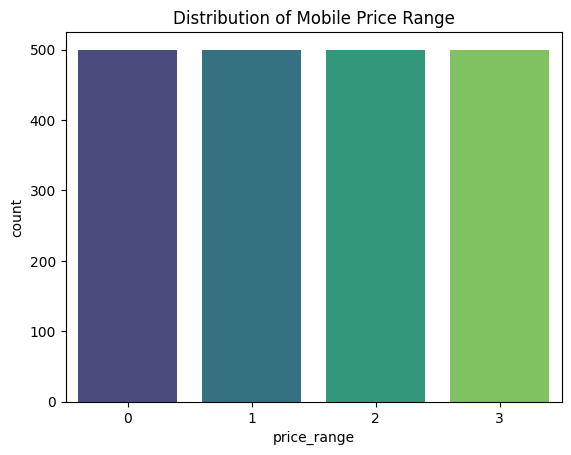

In [4]:
# Target Variable Distribution
sns.countplot(x = 'price_range', data = train_df, palette = 'viridis')
plt.title('Distribution of Mobile Price Range')
plt.show()

In [5]:
# Getting an idea about missing values
train_df.isnull().sum().any()

np.False_

In [ ]:
# np.False_ means that there are no missing values in the data.

In [6]:
# Getting an idea about missing values
test_df.isnull().sum().any()

np.False_

In [ ]:
# np.False_ means that there are no missing values in the data.

In [7]:
# Getting an idea about duplicate rows in the dataset
train_df.duplicated().sum()

np.int64(0)

In [ ]:
# np.int64(0) means that there are no duplicate rows in the dataset.

In [8]:
# Getting an idea about duplicate rows in the dataset
test_df.duplicated().sum()

np.int64(0)

In [ ]:
# np.int64(0) means that there are no duplicate rows in the dataset.

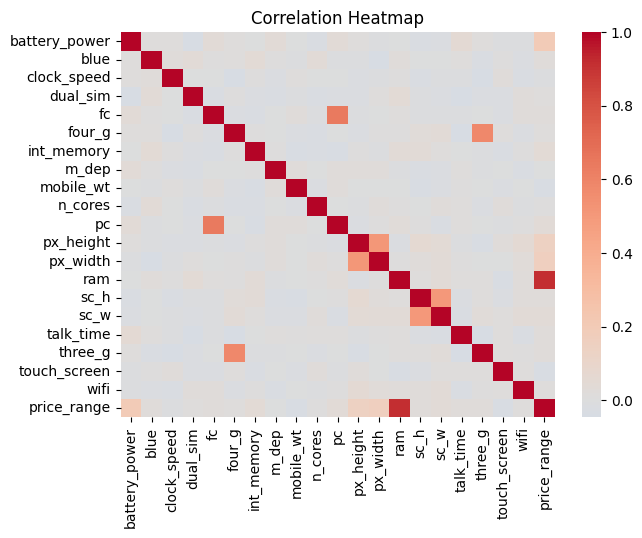

In [10]:
# Correlation Heatmap
plt.figure(figsize = (7, 5))
corr = train_df.corr()
sns.heatmap(corr, cmap = 'coolwarm', center = 0)
plt.title('Correlation Heatmap')
plt.show()

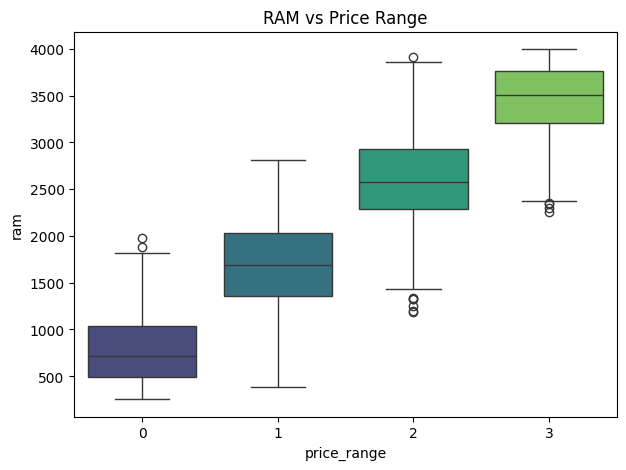

In [11]:
# RAM vs Price Range
plt.figure(figsize = (7, 5))
sns.boxplot(x = 'price_range', y = 'ram', data = train_df, palette = 'viridis')
plt.title('RAM vs Price Range')
plt.show()

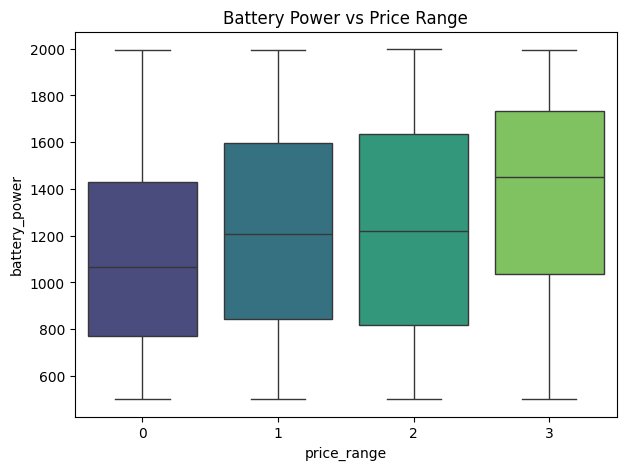

In [12]:
# Battery Power vs Price Range
plt.figure(figsize = (7, 5))
sns.boxplot(x = 'price_range', y = 'battery_power', data = train_df, palette = 'viridis')
plt.title('Battery Power vs Price Range')
plt.show()

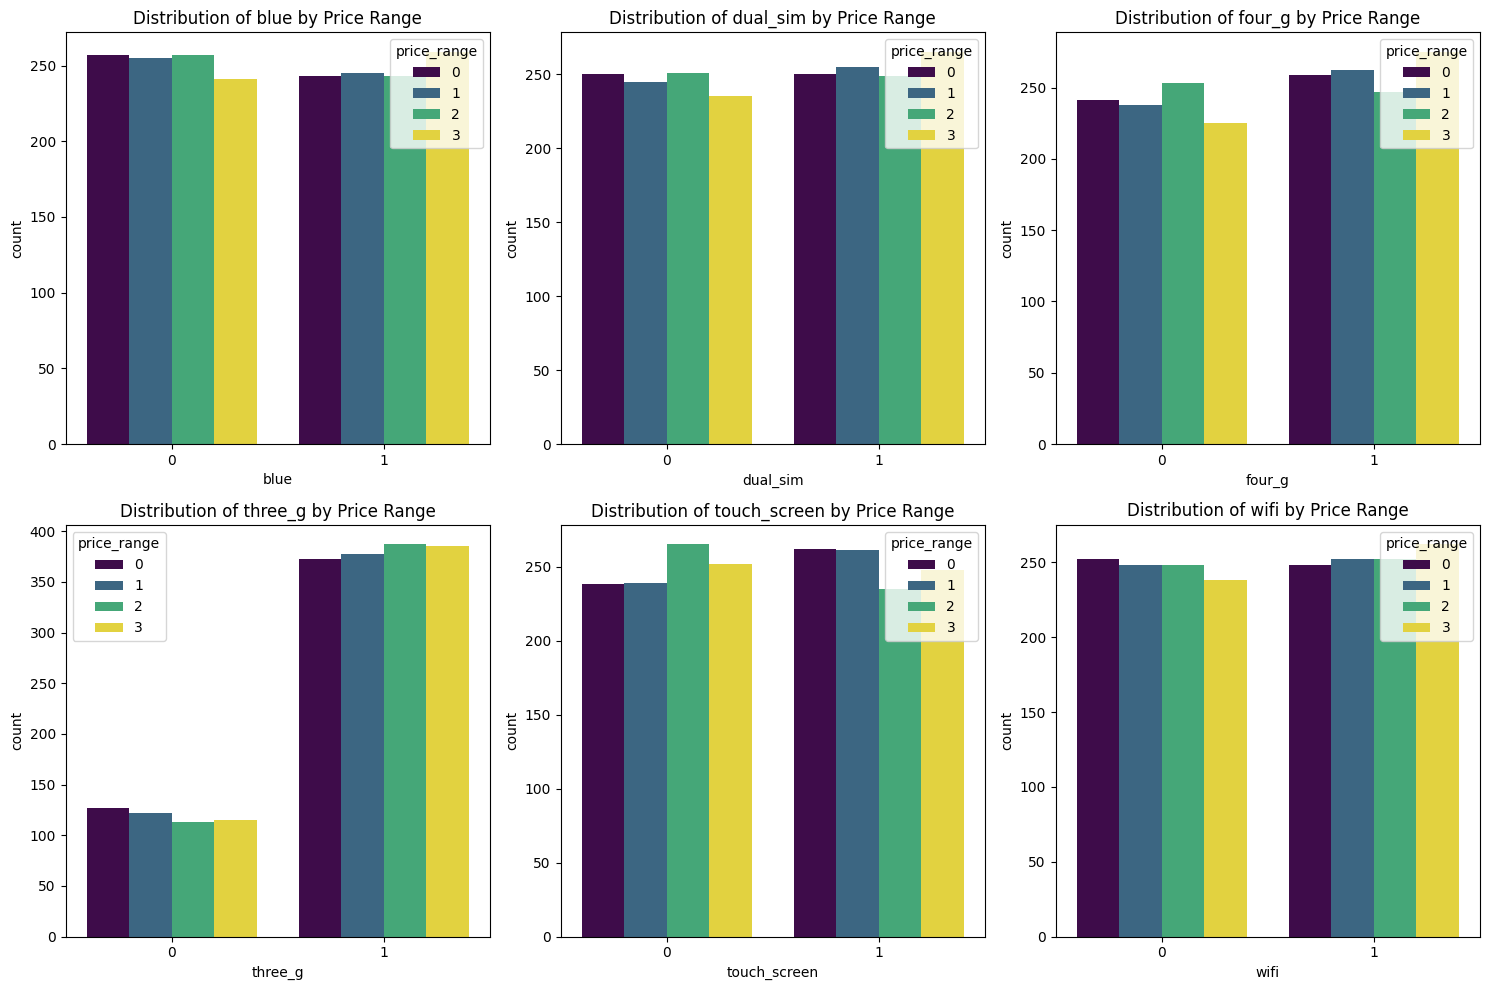

In [14]:
# Binary Features
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
axes = axes.flatten()
for i, feature in enumerate(binary_features):
    sns.countplot(x = feature, hue = 'price_range', data = train_df, palette = 'viridis', ax = axes[i])
    axes[i].set_title(f'Distribution of {feature} by Price Range')
plt.tight_layout()
plt.show()

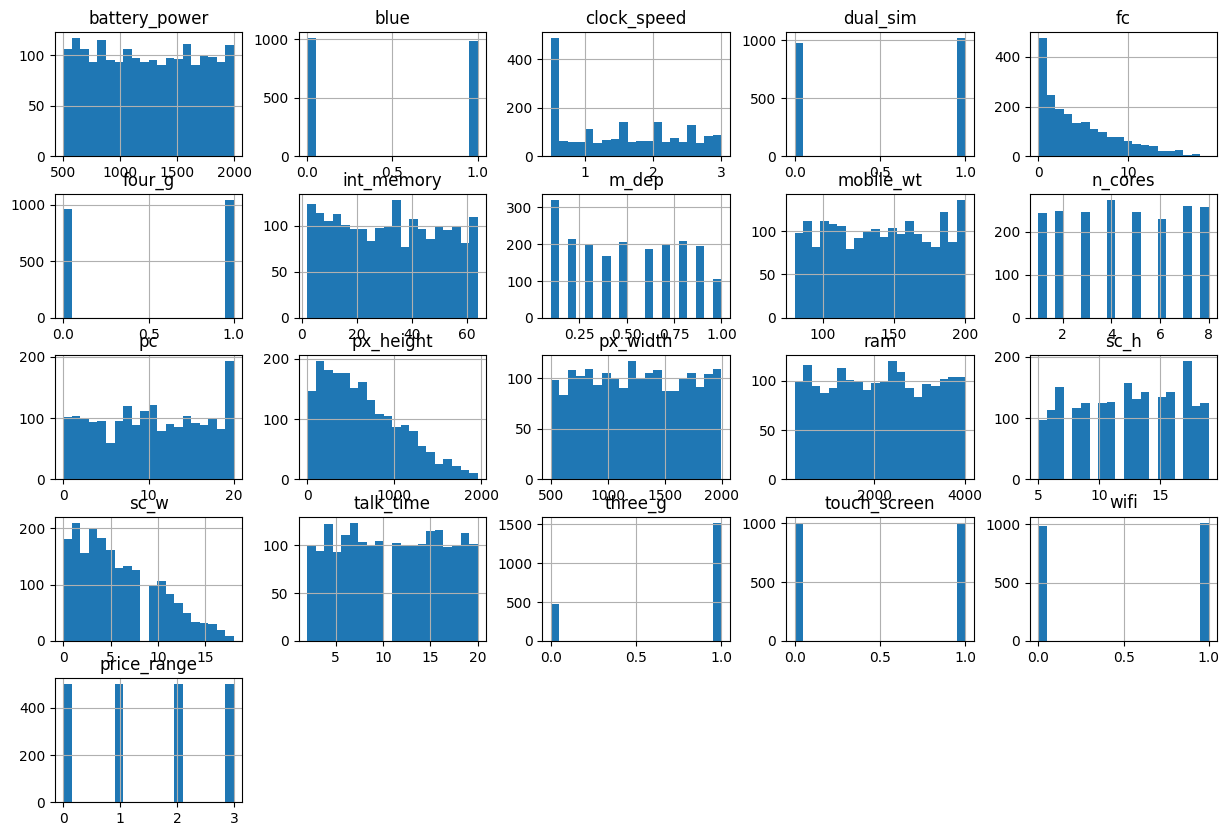

In [15]:
# Historgram for numerical columns
train_df.hist(figsize = (15, 10), bins = 20)
plt.show()

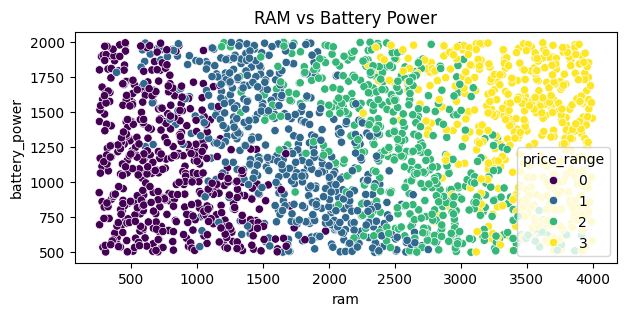

In [16]:
# Scatter Plot
plt.figure(figsize = (7, 3))
sns.scatterplot(x = 'ram', y = 'battery_power', data = train_df, hue = 'price_range', palette = 'viridis')
plt.title('RAM vs Battery Power')
plt.show()

In [17]:
# Seperating input features and target variable
X = train_df.drop('price_range', axis = 1)
y = train_df['price_range']

In [18]:
# Standard Scaling input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

In [22]:
# Baseline ML Models
print(' --- Logistic Regression ---')
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Testing Accuracy Score :', metrics.accuracy_score(y_test, y_pred))

 --- Logistic Regression ---
Testing Accuracy Score : 0.965


In [23]:
# Baseline ML Models
print(' --- Random Forest ---')
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Testing Accuracy Score :', metrics.accuracy_score(y_test, y_pred))

 --- Random Forest ---
Testing Accuracy Score : 0.8975


In [24]:
# Baseline ANN Classifier
model_base = Sequential([
    Dense(32, activation = 'relu', input_dim = X_train.shape[1]),
    Dense(4, activation = 'softmax')
])

In [25]:
# Compiling the model
model_base.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Homework -> Research on the process of compiling the model

In [27]:
# Fitting the model
history_base = model_base.fit(X_train, y_train, epochs = 100, batch_size = 32,
                              validation_split = 0.2, verbose = 1)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9623 - loss: 0.2142 - val_accuracy: 0.9094 - val_loss: 0.2702
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9699 - loss: 0.2034 - val_accuracy: 0.9156 - val_loss: 0.2635
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9549 - loss: 0.2120 - val_accuracy: 0.9125 - val_loss: 0.2566
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9599 - loss: 0.1973 - val_accuracy: 0.9125 - val_loss: 0.2524
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9676 - loss: 0.1915 - val_accuracy: 0.9125 - val_loss: 0.2459
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.1768 - val_accuracy: 0.9219 - val_loss: 0.2415
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9627 - loss: 0.1808 - val_accuracy: 0.9094 - val_loss: 0.2382
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9763 - loss: 0.1654 - val_accuracy: 0.9219 - v

In [30]:
# Evaluating the model
loss, accuracy = model_base.evaluate(X_train, y_train)
print('Training Accuracy :', accuracy)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0231
Training Accuracy : 0.9868749976158142


In [31]:
# Evaluating the model
loss, accuracy = model_base.evaluate(X_test, y_test)
print('Testing Accuracy :', accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9381 - loss: 0.1384 
Testing Accuracy : 0.925000011920929


In [ ]:
'''
As we can see, the difference between training and testing data is more than 5%,
hence we can conclude that it is an overfitted model.
'''

In [33]:
# Optimized ANN with Dropout
model_opt = Sequential([
    Dense(128, activation = 'relu', input_dim = X_train.shape[1]), # Hidden Layer 1
    Dropout(0.5),
    Dense(64, activation = 'relu'), # Hidden Layer 2
    Dropout(0.5),
    Dense(32, activation = 'relu'), # Hidden Layer 3
    Dropout(0.5),
    Dense(4, activation = 'softmax')
])

In [34]:
# Compiling the model
model_opt.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [35]:
# Early Stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [36]:
# Fitting the data
history_opt = model_opt.fit(X_train, y_train, epochs = 100, batch_size = 32,
                            validation_split = 0.2, callbacks = [early_stop], verbose = 1)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2569 - loss: 1.5701 - val_accuracy: 0.4563 - val_loss: 1.3122
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3042 - loss: 1.4182 - val_accuracy: 0.5500 - val_loss: 1.2524
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3518 - loss: 1.3036 - val_accuracy: 0.5781 - val_loss: 1.1350
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4049 - loss: 1.2194 - val_accuracy: 0.5969 - val_loss: 0.9911
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4622 - loss: 1.0907 - val_accuracy: 0.5969 - val_loss: 0.8628
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4836 - loss: 1.0158 - val_accuracy: 0.6000 - val_loss: 0.7842
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5625 - loss: 0.9114 - val_accuracy: 0.6375 - val_loss: 0.7156
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5931 - loss: 0.8651 - val_accuracy: 0.7031 - v

In [37]:
# Model Evaluation
loss, accuracy = model_opt.evaluate(X_train, y_train)
print('Training Accuracy :', accuracy)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9693 - loss: 0.1347
Training Accuracy : 0.9593750238418579


In [38]:
# Model Evaluation
loss, accuracy = model_opt.evaluate(X_test, y_test)
print('Training Accuracy :', accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9495 - loss: 0.1713  
Training Accuracy : 0.9275000095367432


In [ ]:
'''
Comments ->
As we can see, the performance difference between training and testing data
is within 5%, implying that it is not an ovefitted model.
'''

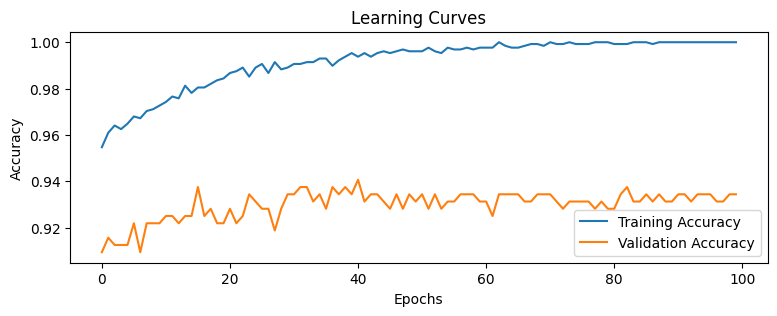

In [41]:
# Learning Curves
plt.figure(figsize = (9, 3))
plt.plot(history_base.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_base.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

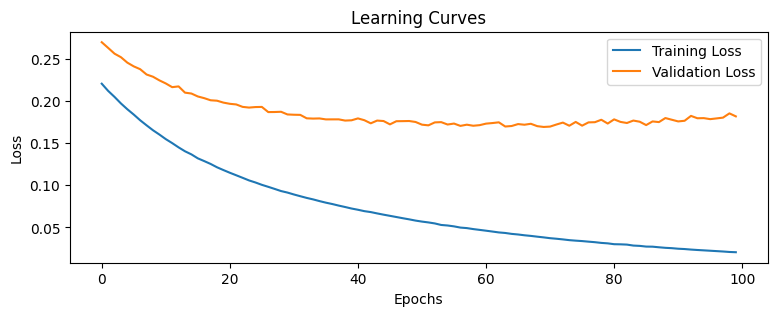

In [42]:
# Learnings Curves (Loss Function)
plt.figure(figsize = (9, 3))
plt.plot(history_base.history['loss'], label = 'Training Loss')
plt.plot(history_base.history['val_loss'], label = 'Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()